In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(font=plt.rcParams['font.family'], rc={'axes.unicode_minus': False})

# KOSIS API 통해 주택착공데이터 다운

In [2]:
apiKey = 'M2U3MTBiYTk2MWU5NTdjYTgxOGIyMjJkYzc0NDlmMTY='
url = 'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList'
params = {
    'apiKey' : apiKey,
    'orgId' : '116',  # 기관 ID
    'tblId' : 'DT_MLTM_5387',   # 통계표 ID
    'objL1' : 'ALL',  # 분류1
    'objL2' : 'ALL',  # 분류2
    'objL3' : 'ALL',  # 분류3
    'objL4' : 'ALL',  # 분류4
    'itmId' : '13103766969T1',  # 항목 ID
    'prdSe' : 'M',  # 수록주기
    'format' : 'json',  # 결과 유형
    'jsonVD' : 'Y'  # json Viewer
}

months = []
for year in range(2011, 2026):
    for month in range(1, 13):
        months.append(f"{year}{month:02d}")

dfs = []

for month in months:
    params['startPrdDe'] = month
    params['endPrdDe'] = month
    r = requests.get(url, params=params)
    json = r.json()
    df = pd.DataFrame(json)
    dfs.append(df)

begin_df = pd.concat(dfs)
begin_df['YR'] = begin_df['PRD_DE'].str[:4]
begin_df['DT'] = begin_df['DT'].astype(int)
begin_df = begin_df[['YR', 'PRD_DE', 'C1_NM', 'C2_NM', 'C3_NM', 'C4_NM', 'DT']]
begin_df

,YR,PRD_DE,C1_NM,C2_NM,C3_NM,C4_NM,DT
0,2011,201101,총계,계(다가구동수기준),계(다가구동수기준),계(다가구동수기준),10036
1,2011,201101,총계,계(다가구가구수기준),계(다가구가구수기준),계(다가구가구수기준),14400
2,2011,201101,총계,단독,단독,단독,1761
3,2011,201101,총계,단독,다가구,동수,738
4,2011,201101,총계,단독,다가구,가구수,5102
...,...,...,...,...,...,...,...
171,2025,202512,제주,단독,다가구,동수,1
172,2025,202512,제주,단독,다가구,가구수,5
173,2025,202512,제주,다세대,다세대,다세대,24
174,2025,202512,제주,연립,연립,연립,40


# KOSIS API 통해 주택준공데이터 다운

In [3]:
params = {
    'apiKey' : apiKey,
    'orgId' : '116',  # 기관 ID
    'tblId' : 'DT_MLTM_5373',   # 통계표 ID
    'objL1' : 'ALL',  # 분류1
    'objL2' : 'ALL',  # 분류2
    'objL3' : 'ALL',  # 분류3
    'objL4' : 'ALL',  # 분류4
    'itmId' : '13103766973T1',  # 항목 ID
    'prdSe' : 'M',  # 수록주기
    'format' : 'json',  # 결과 유형
    'jsonVD' : 'Y'  # json Viewer
}

months = []
for year in range(2011, 2026):
    for month in range(1, 13):
        months.append(f"{year}{month:02d}")

dfs = []

for month in months:
    params['startPrdDe'] = month
    params['endPrdDe'] = month
    r = requests.get(url, params=params)
    json = r.json()
    df = pd.DataFrame(json)
    dfs.append(df)

complete_df = pd.concat(dfs)
complete_df['YR'] = complete_df['PRD_DE'].str[:4]
complete_df['DT'] = complete_df['DT'].astype(int)
complete_df = complete_df[['YR', 'PRD_DE', 'C1_NM', 'C2_NM', 'C3_NM', 'C4_NM', 'DT']]
complete_df

,YR,PRD_DE,C1_NM,C2_NM,C3_NM,C4_NM,DT
0,2011,201101,총계,계(다가구동수기준),계(다가구동수기준),계(다가구동수기준),22704
1,2011,201101,총계,계(다가구가구수기준),계(다가구가구수기준),계(다가구가구수기준),31369
2,2011,201101,총계,단독,단독,단독,2520
3,2011,201101,총계,단독,다가구,동수,1272
4,2011,201101,총계,단독,다가구,가구수,9937
...,...,...,...,...,...,...,...
171,2025,202512,제주,단독,다가구,동수,2
172,2025,202512,제주,단독,다가구,가구수,6
173,2025,202512,제주,다세대,다세대,다세대,15
174,2025,202512,제주,연립,연립,연립,0


# 서울 아파트 착공 및 준공 데이터 분석

In [4]:
seoul_apt_begin = begin_df[(begin_df['C1_NM'] == '서울') & (begin_df['C2_NM'] == '아파트')].copy()
seoul_apt_begin = seoul_apt_begin.groupby(['YR'])[['DT']].sum()
seoul_apt_begin.rename(columns={'DT': '착공'}, inplace=True)

seoul_apt_complete = complete_df[(complete_df['C1_NM'] == '서울') & (complete_df['C2_NM'] == '아파트')].copy()
seoul_apt_complete = seoul_apt_complete.groupby(['YR'])[['DT']].sum()
seoul_apt_complete.rename(columns={'DT': '준공'}, inplace=True)

seoul_apt = pd.merge(seoul_apt_begin, seoul_apt_complete, left_index=True, right_index=True, how='inner')
display(seoul_apt)

,착공,준공
YR,,
2011,40400,38482
2012,32476,26115
2013,34624,33607
2014,30413,43996
2015,40244,22694
2016,49695,35388
2017,55274,29201
2018,44744,38853
2019,51321,45860


In [14]:
print("착공 평균:", f"{int(round(seoul_apt['착공'].mean())):,}")
print("준공 평균:", f"{int(round(seoul_apt['준공'].mean())):,}")

착공 평균: 38,364
준공 평균: 37,674


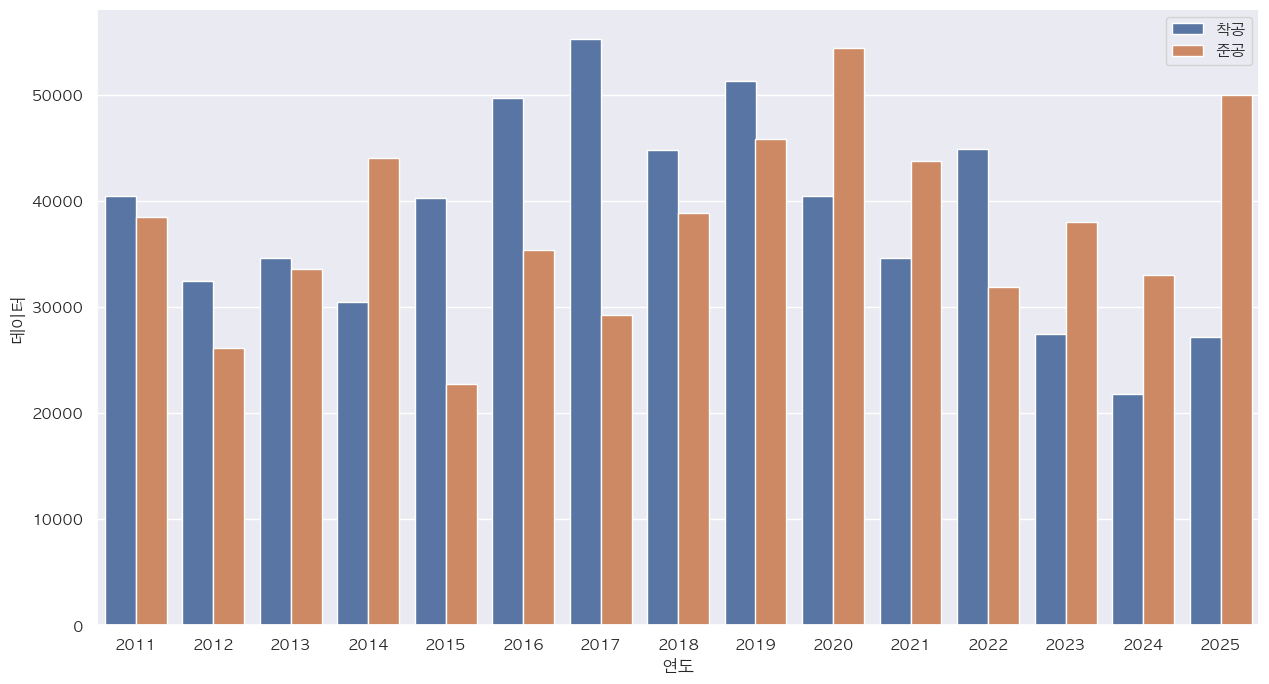

In [5]:
seoul_apt_sns = seoul_apt.melt(ignore_index=False, var_name='type', value_name='data')

plt.figure(figsize=(15, 8))
sns.barplot(data=seoul_apt_sns, x=seoul_apt_sns.index, y='data', hue='type')
plt.xlabel('연도', fontweight='bold')
plt.ylabel('데이터')
plt.legend(title='')
plt.show()

# 경기, 인천 아파트 착공 및 준공 데이터 분석

In [7]:
capital_area_apt_begin = begin_df[(begin_df['C1_NM'].isin(['경기', '인천'])) & (begin_df['C2_NM'] == '아파트')].copy()
capital_area_apt_begin = capital_area_apt_begin.groupby(['YR'])[['DT']].sum()
capital_area_apt_begin.rename(columns={'DT': '착공'}, inplace=True)

capital_area_apt_complete = complete_df[(complete_df['C1_NM'].isin(['경기', '인천'])) & (complete_df['C2_NM'] == '아파트')].copy()
capital_area_apt_complete = capital_area_apt_complete.groupby(['YR'])[['DT']].sum()
capital_area_apt_complete.rename(columns={'DT': '준공'}, inplace=True)

capital_area_apt = pd.merge(capital_area_apt_begin, capital_area_apt_complete, left_index=True, right_index=True, how='inner')
display(capital_area_apt)

,착공,준공
YR,,
2011,68833,86435
2012,77738,83944
2013,82824,62379
2014,97771,73746
2015,233693,92301
2016,194105,113560
2017,147952,151679
2018,140290,196319
2019,189368,148009


In [13]:
print("착공 평균:", f"{int(round(capital_area_apt['착공'].mean())):,}")
print("준공 평균:", f"{int(round(capital_area_apt['준공'].mean())):,}")

착공 평균: 134,543
준공 평균: 121,639


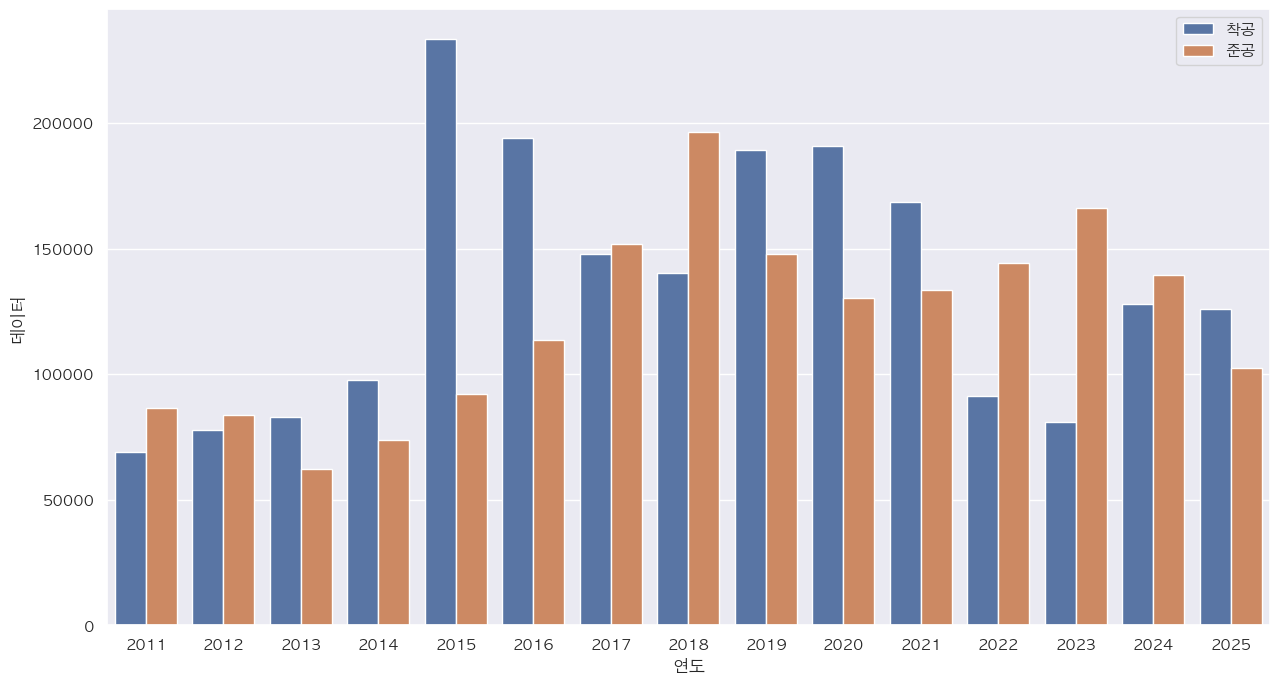

In [8]:
capital_area_apt_sns = capital_area_apt.melt(ignore_index=False, var_name='type', value_name='data')

plt.figure(figsize=(15, 8))
sns.barplot(data=capital_area_apt_sns, x=capital_area_apt_sns.index, y='data', hue='type')
plt.xlabel('연도', fontweight='bold')
plt.ylabel('데이터')
plt.legend(title='')
plt.show()

In [10]:
begin_df.to_csv('data/kosis_housing_begin.csv', index=False)
complete_df.to_csv('data/kosis_housing_complete.csv', index=False)